In [3]:
import pandas as pd

# Load all model metrics
rf_metrics = pd.read_csv("./data/rf_metrics.csv")
xgb_metrics = pd.read_csv("./data/xgb_metrics.csv")
tabnet_metrics = pd.read_csv("./data/tabnet_metrics.csv")
node_metrics = pd.read_csv("./data/node_metrics.csv")
ftt_metrics = pd.read_csv("./data/ftt_metrics.csv")

# Combine into one DataFrame
summary_df = pd.concat([rf_metrics, xgb_metrics, tabnet_metrics, node_metrics, ftt_metrics], ignore_index=True)
summary_df


,Model,Accuracy,Precision,Recall,F1-score,Training Time (s)
0,Random Forest,0.9990,1.000000,0.970588,0.985075,0.305816
1,XGBoost,0.9990,1.000000,0.970588,0.985075,0.119839
2,TabNet,0.9990,1.000000,0.970588,0.985075,17.970310
3,NODE,0.7535,0.117117,0.955882,0.208668,1.543677
4,FT-Transformer,0.7965,0.140127,0.970588,0.244898,81.621315


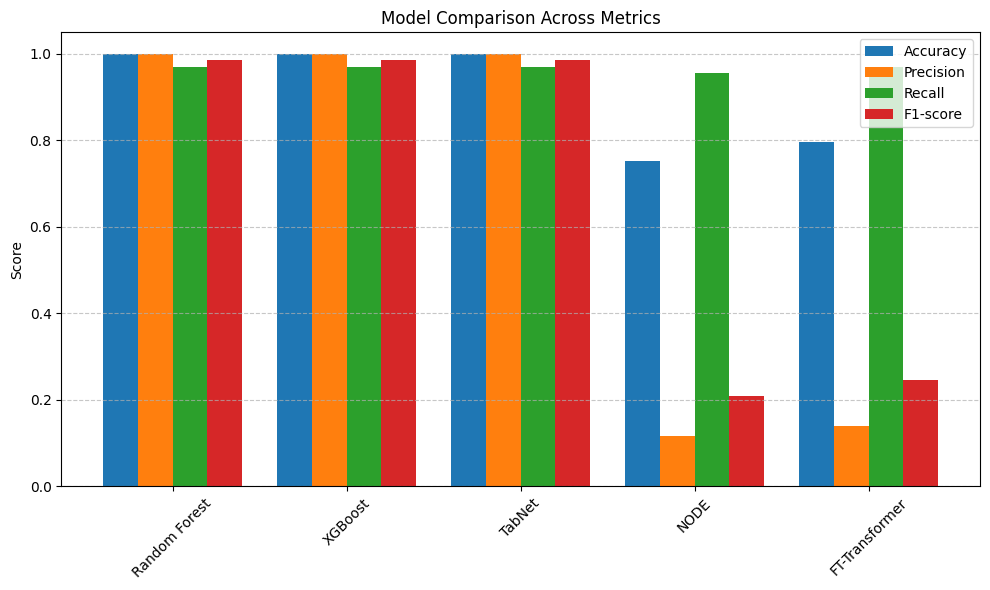

In [6]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = summary_df['Model'].tolist()
values = [summary_df[metric].values for metric in metrics]

x = np.arange(len(models))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

for i, (metric, val) in enumerate(zip(metrics, values)):
    ax.bar(x + i * width, val, width, label=metric)

ax.set_ylabel('Score')
ax.set_title('Model Comparison Across Metrics')
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


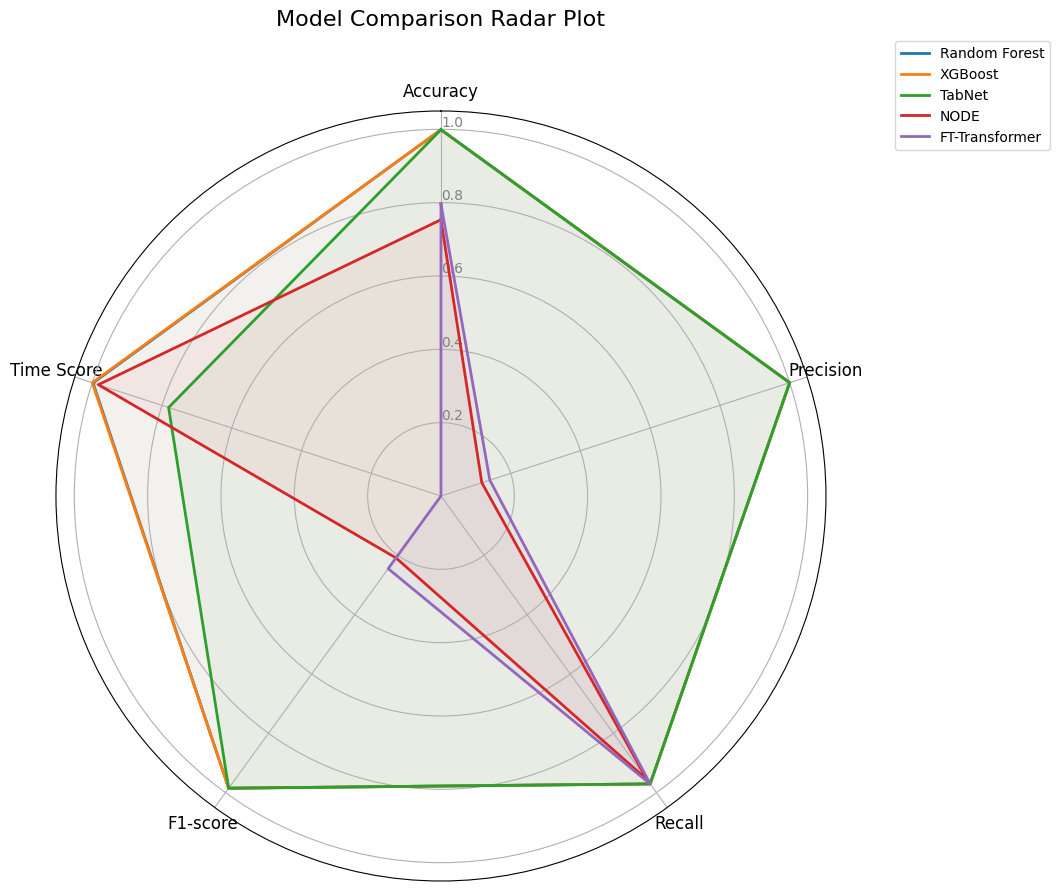

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# --- Prepare Data for Radar Plot ---
radar_df = summary_df.set_index('Model')

# Metrics to plot
categories = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Training Time (s)']
radar_df_plot = radar_df[categories].copy()

# Normalize Training Time (lower is better)
min_time = radar_df_plot['Training Time (s)'].min()
max_time = radar_df_plot['Training Time (s)'].max()
if max_time - min_time != 0:
    radar_df_plot['Time Score'] = 1 - (radar_df_plot['Training Time (s)'] - min_time) / (max_time - min_time)
else:
    radar_df_plot['Time Score'] = 1.0

# Select final metrics
categories_plot = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time Score']
radar_df_final = radar_df_plot[categories_plot]

# Radar settings
num_vars = len(categories_plot)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# --- Create Radar Plot ---
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories_plot, size=12)
ax.set_rlabel_position(0)
yticks = np.arange(0.2, 1.1, 0.2)
yticklabels = [f"{tick:.1f}" for tick in yticks]
plt.yticks(yticks, yticklabels, color="grey", size=10)
plt.ylim(0, 1.05)

# Default color palette
colors = plt.cm.tab10.colors

# Plot each model
for i, (model_name, row) in enumerate(radar_df_final.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name, color=colors[i % len(colors)])
    ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.05)

# Legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Model Comparison Radar Plot', size=16, y=1.1)

plt.show()


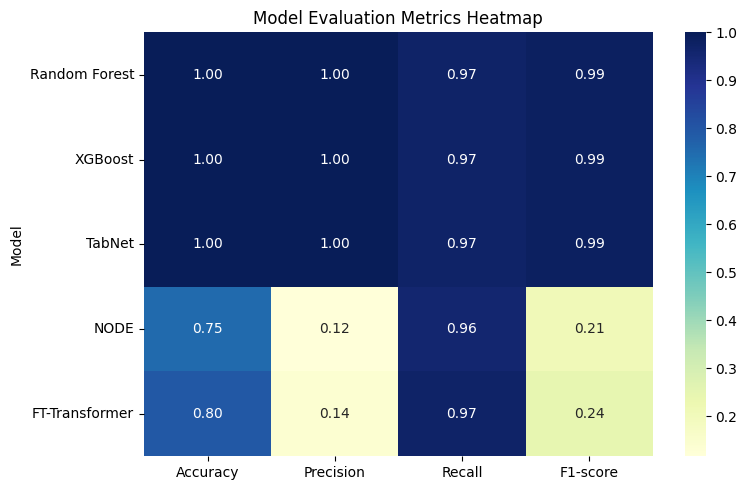

In [7]:
import seaborn as sns

heatmap_df = summary_df.set_index("Model")[['Accuracy', 'Precision', 'Recall', 'F1-score']]
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Evaluation Metrics Heatmap")
plt.tight_layout()
plt.show()


### 🔧 Hyperparameters Used in Each Model

| Model             | Key Hyperparameters                                                                 |
|------------------|--------------------------------------------------------------------------------------|
| **Random Forest**   | `n_estimators=100` (default), `random_state=42`                                   |
| **XGBoost**         | `use_label_encoder=False`, `eval_metric='logloss'`, `random_state=42`             |
| **TabNet**          | `max_epochs=200`, `patience=20`, `batch_size=1024`, `virtual_batch_size=128`, `seed=42` |
| **NODE**            | `hidden_units=[128, 64]`, `max_epochs=40`, `lr=1e-4`, `batch_size=128`, `weighted loss` |
| **FT-Transformer**  | `hidden_dim=64`, `num_heads=4`, `num_layers=2`, `max_epochs=40`, `lr=1e-3`, `weighted loss` |
